## Student Performance Indicator

### Lifecycle of a Machine Learning Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1. Problem Statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

### 2. Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 columns and 1000 rows

#### 2.1 Import Data and Required Packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

##### Import Dataset

In [3]:
df = pd.read_csv('data/StudentsPerformance.csv')

##### Show Top Records 

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##### Shape of Dataset

In [5]:
df.shape

(1000, 8)

#### 2.2 Dataset Information
- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree, associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Datachecks to perform
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

#### 3.1 Checking Missing values

In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values

#### 3.2. Check Duplicates

In [7]:
df.duplicated().sum()

np.int64(0)

There are no duplicate values

#### 3.3 Check data types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 Checking the number of unique values of each column

In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

#### 3.5 Check statistics of data set

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score 0 for math, for writing minimum is much higher (10) and even higher for reading (17)

#### 3.6 Exploring Data

In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [15]:
print("Categories in 'gender' variable: ", end = "")
print(df.gender.unique())

print("Categories in 'race/ethnicity' variable: ", end = "")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable: ", end = "")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable: ", end = "")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable: ", end = "")
print(df['test preparation course'].unique())


Categories in 'gender' variable: ['female' 'male']
Categories in 'race/ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test preparation course' variable: ['none' 'completed']


In [16]:
# Define Numerical and Categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('Numerical Features: Count = {}, Names = {}'.format(len(numeric_features), numeric_features))
print('Categorical Features: Count = {}, Names = {}'.format(len(categorical_features), categorical_features))


Numerical Features: Count = 3, Names = ['math score', 'reading score', 'writing score']
Categorical Features: Count = 5, Names = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


#### Adding Column for total score and average

In [17]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average score'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [ ]:
print("Students with full marks in Reading: {}".format(df[df['reading score'] == 100]['lunch'].count()))
print("Students with full marks in Maths: {}".format(df[df['math score'] == 100]['lunch'].count()))
print("Students with full marks in Writing: {}".format(df[df['writing score'] == 100]['lunch'].count()))

Students with full marks in Reading: 17
Students with full marks in Maths: 7
Students with full marks in Writing: 14


In [23]:
print("Students with less than 20 marks in Reading: {}".format(df[df['reading score'] < 20]['lunch'].count()))
print("Students with less than 20 marks in Maths: {}".format(df[df['math score'] < 20]['lunch'].count()))
print("Students with less than 20 marks in Writing: {}".format(df[df['writing score'] < 20]['lunch'].count()))

Students with less than 20 marks in Reading: 1
Students with less than 20 marks in Maths: 4
Students with less than 20 marks in Writing: 3


#### Insight
Students performed best in Reading and worst in Maths

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

##### 4.1.1 Histogram & KDE

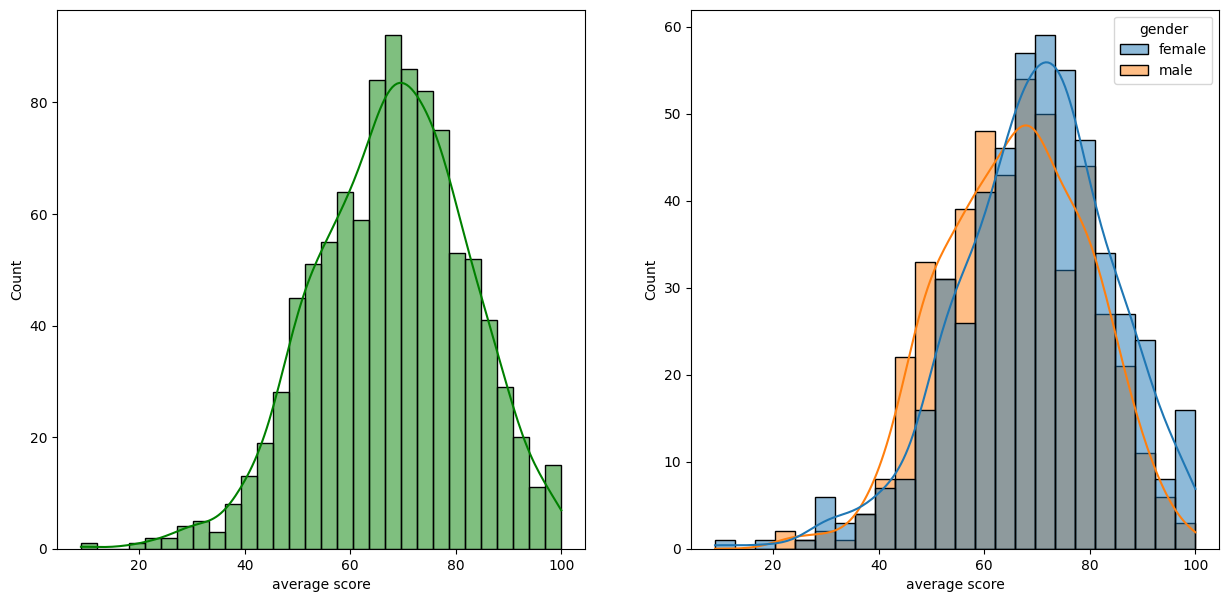

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average score',kde=True,hue='gender')
plt.show()

##### Insights
Female students tend to perform better than male students.

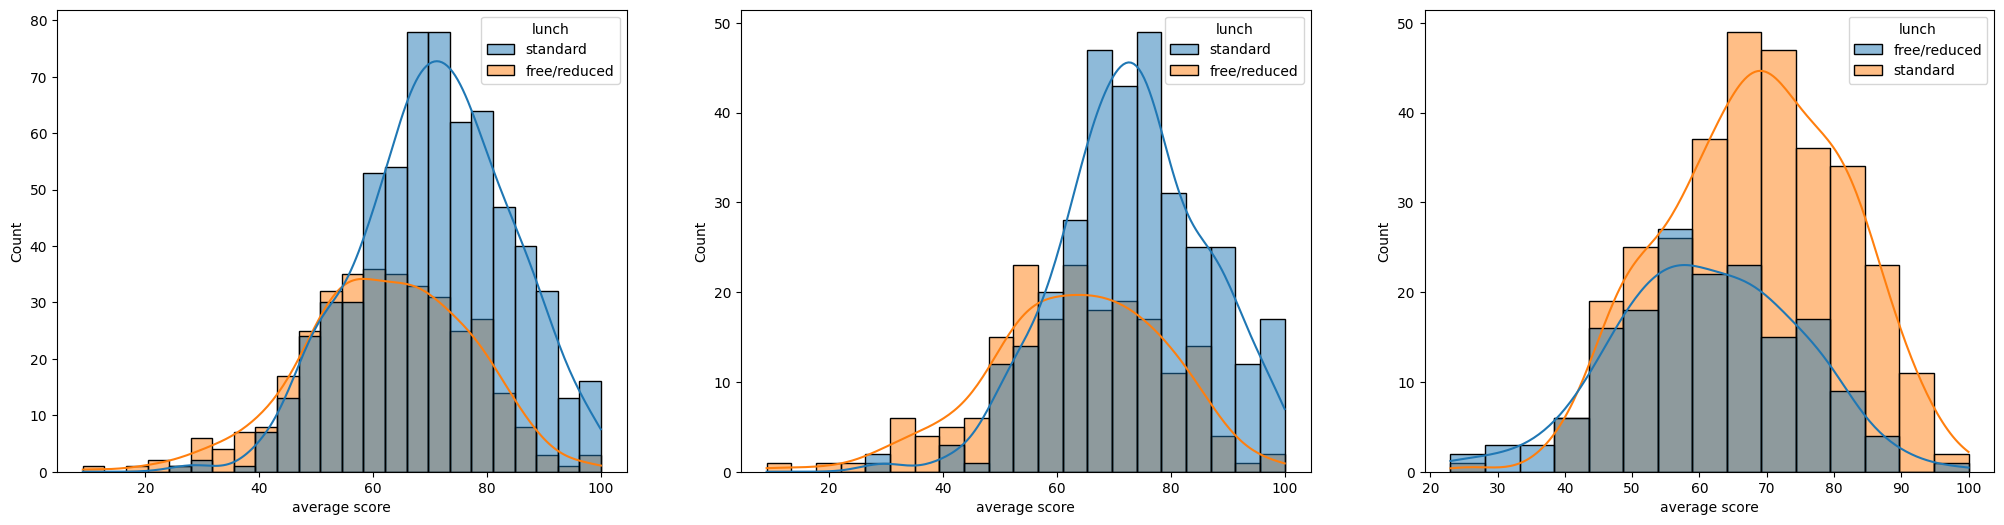

In [34]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average score',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='lunch')
plt.show()

##### Insights
Standard lunch correlates to better performance across the board. The impact is similar in males and females.

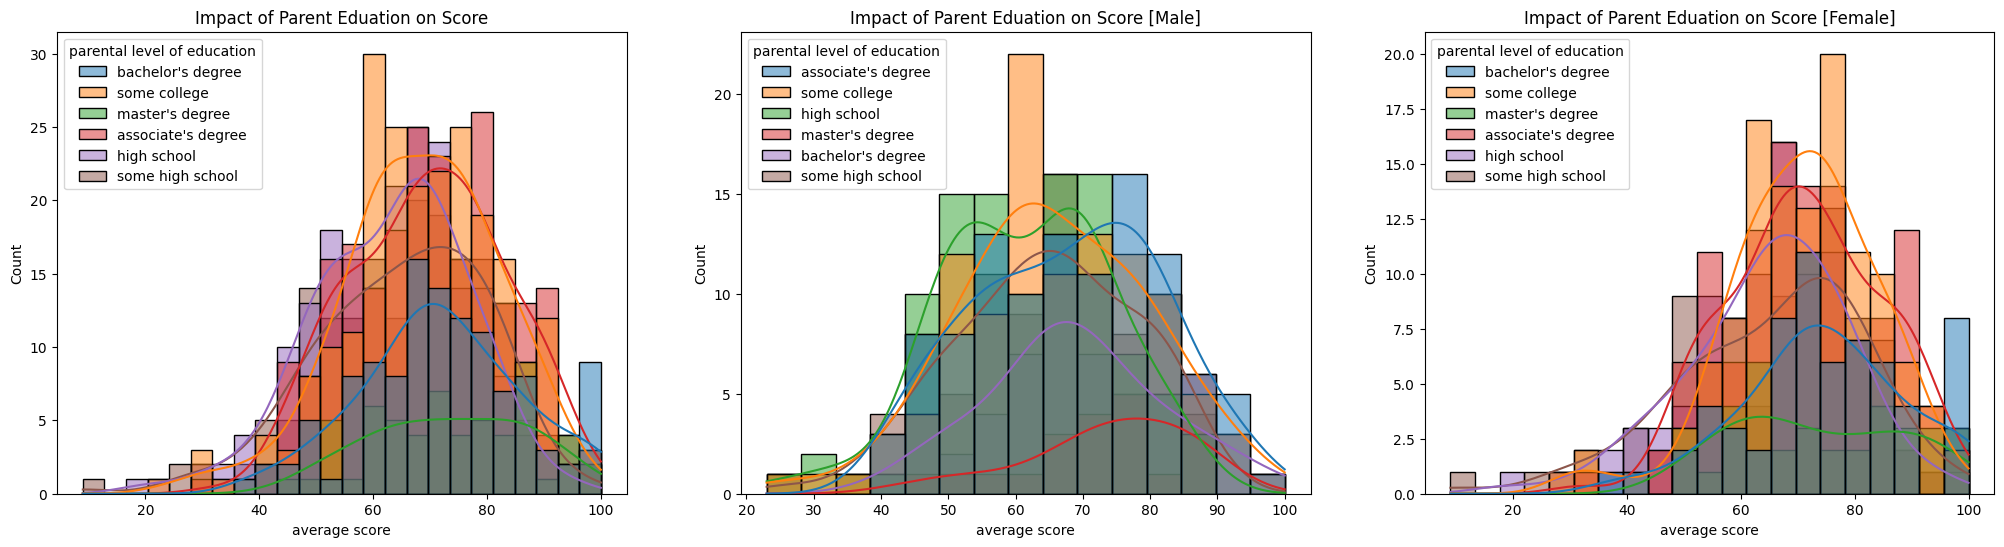

In [38]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average score',kde=True,hue='parental level of education')
ax = ax.set_title("Impact of Parent Eduation on Score")

plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='parental level of education')
ax = ax.set_title("Impact of Parent Eduation on Score [Male]")

plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='parental level of education')
ax = ax.set_title("Impact of Parent Eduation on Score [Female]")
plt.show()

#### Insights
- In general, parents education does not impact student's performance.
- Parents education has slight impact on the scores of male students, specifically parents with masters and associate degrees. No such impact is visible in females.

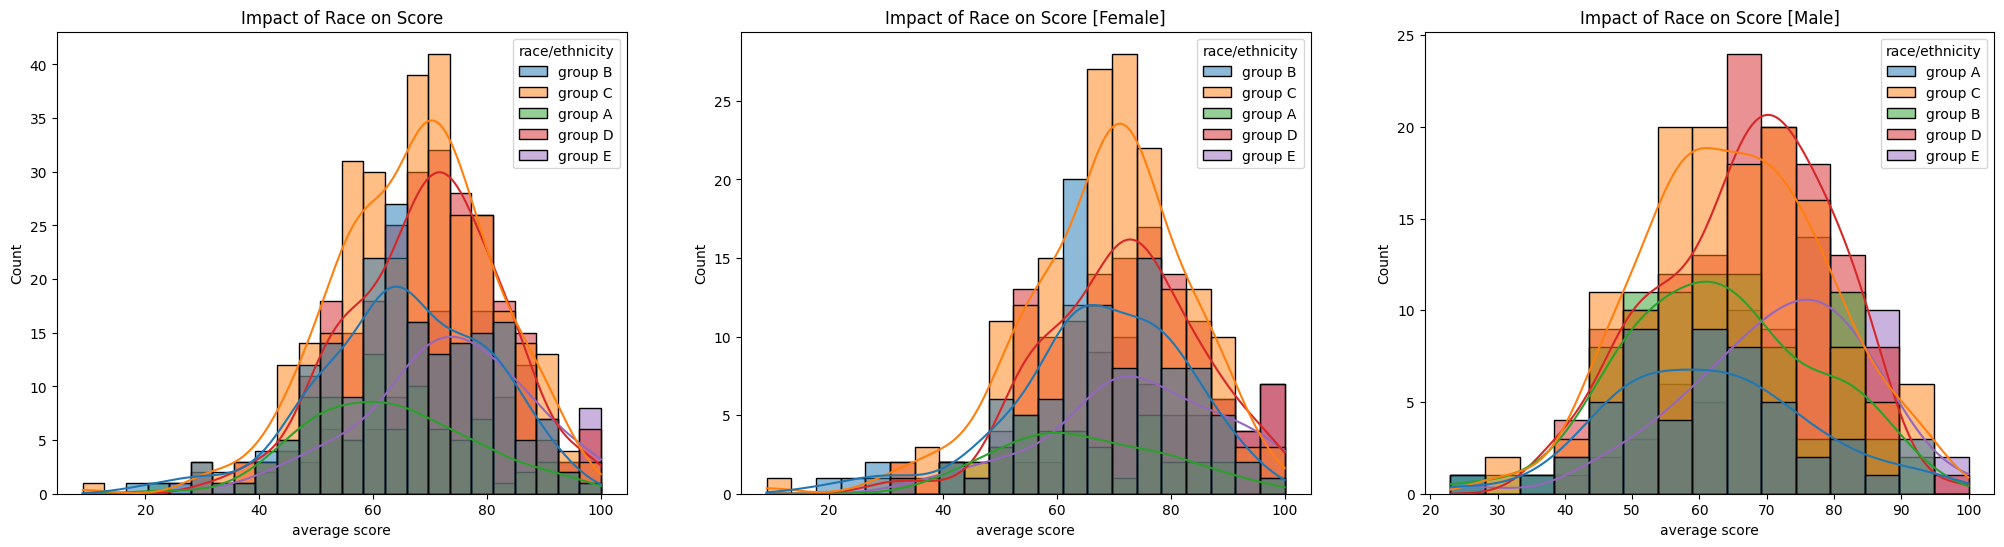

In [40]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average score',kde=True,hue='race/ethnicity')
ax = ax.set_title("Impact of Race on Score")

plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='race/ethnicity')
ax = ax.set_title("Impact of Race on Score [Female]")

plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='race/ethnicity')
ax = ax.set_title("Impact of Race on Score [Male]")
plt.show()

#### Insights

Students belonging the Group A and Group B tend to perform poorly irrespective of gender.

### 4.3 Maximum score in the three subjects

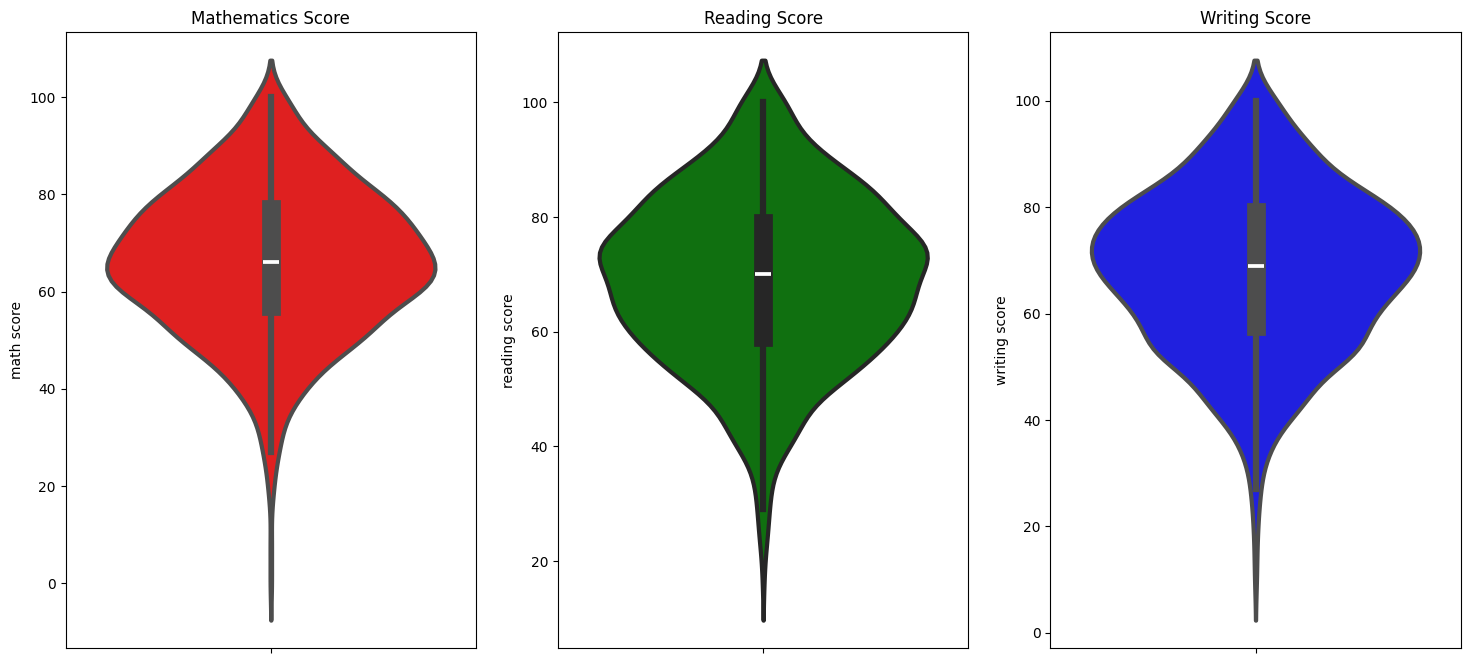

In [43]:
plt.figure(figsize=(18,8))
plt.subplot(1,3,1)
plt.title('Mathematics Score')
sns.violinplot(y = 'math score', data = df, color='red', linewidth=3)

plt.subplot(1,3,2)
plt.title('Reading Score')
sns.violinplot(y = 'reading score', data = df, color='green', linewidth=3)

plt.subplot(1,3,3)
plt.title('Writing Score')
sns.violinplot(y = 'writing score', data = df, color='blue', linewidth=3)

plt.show()

#### Insights
- Most students score around 60 - 80 in Maths, with the peak closer to 60.
- Most students score around 50 - 80 in Reading and Writing, with the peak closer to 75.

### 4.3 Multivariate analysis using pieplot

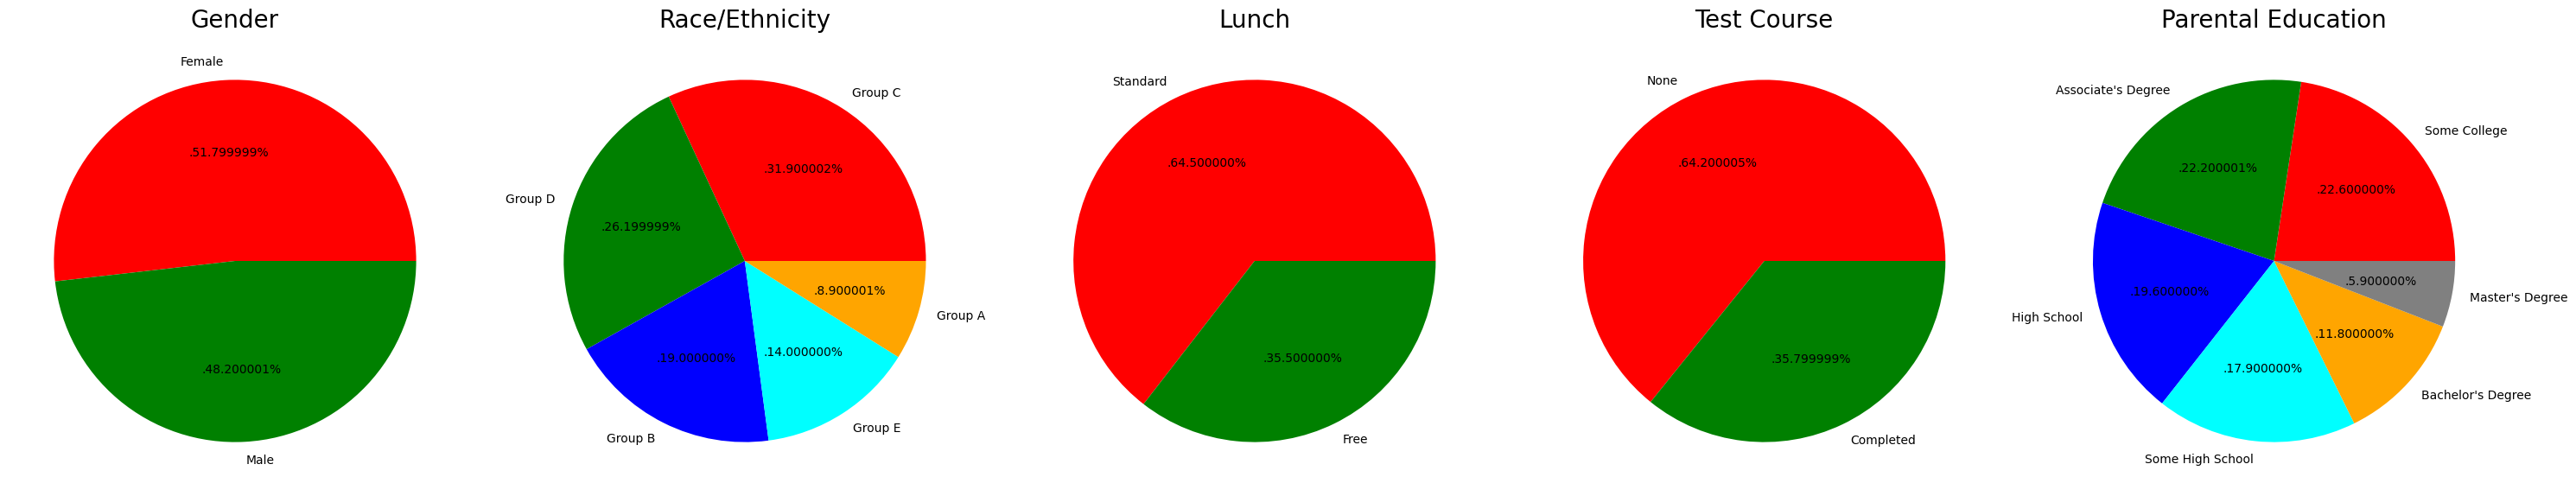

In [50]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.4 Feature Wise Visualization
##### 4.4.1 Gender Distribution

([<matplotlib.patches.Wedge at 0x268fc4cc410>,
 [Text(-0.062170487413935493, 1.0982416994881927, 'Male'),
  Text(0.06782216900078375, -1.1980818642279956, 'Female')],
 [Text(-0.03391117495305572, 0.5990409269935596, '51.8%'),
  Text(0.039562931917123845, -0.6988810874663307, '48.2%')])

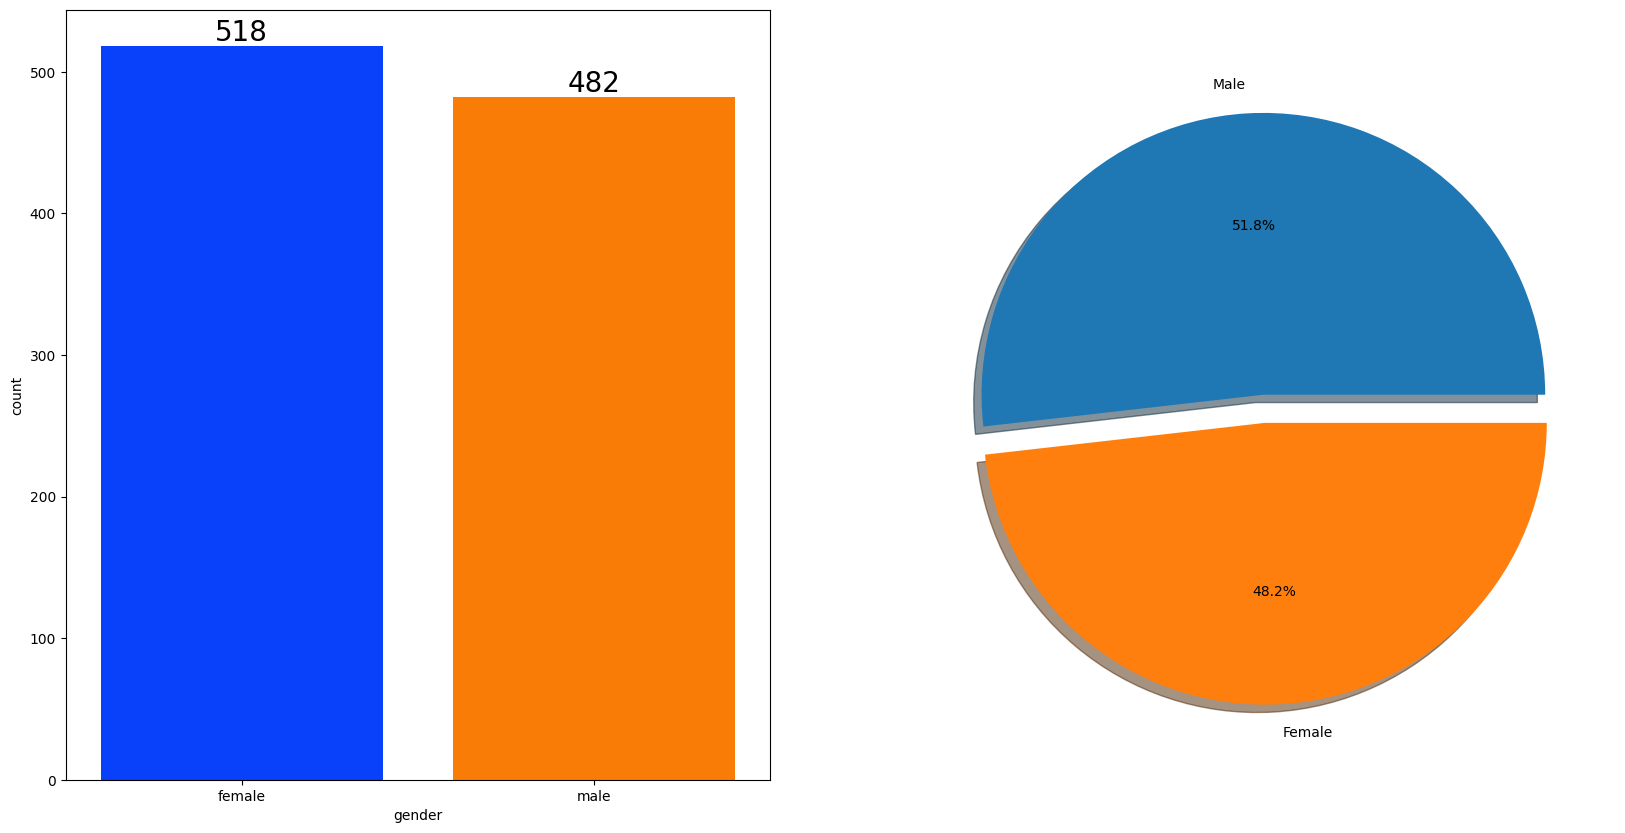

In [54]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
     ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True)

#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

Does Gender Impact student performance?

In [59]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math score,reading score,writing score,total score,average score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


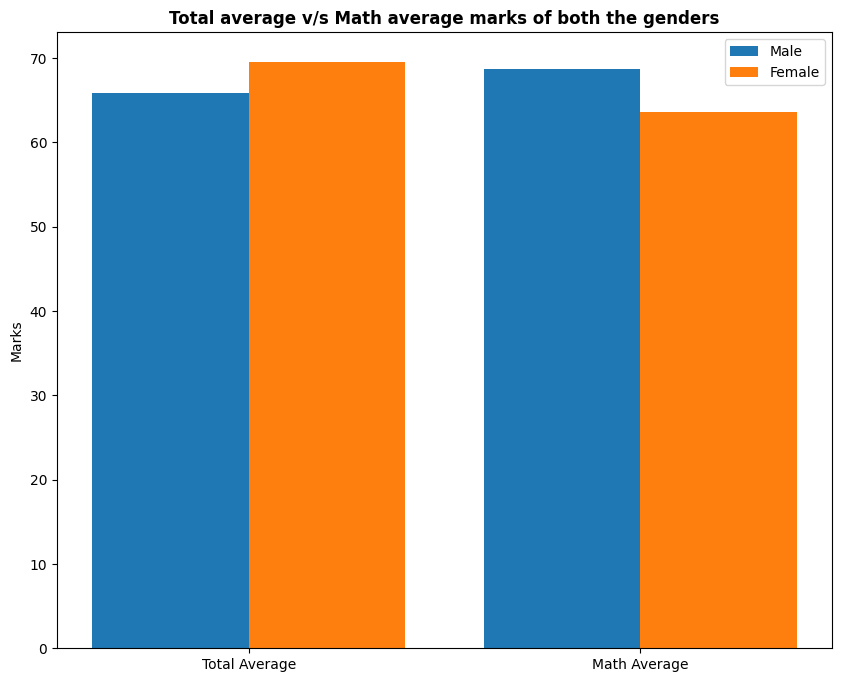

In [62]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average score'][0], gender_group['math score'][0]]
male_scores = [gender_group['average score'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights 
On an average females have a better overall score than males, but males outperform females in Maths.

#### 4.4.2 Race/Ethnicity Distribution and Performance Impact

([<matplotlib.patches.Wedge at 0x268ffbcfc50>,
 [Text(0.5923243462640188, 0.9269044550669194, 'group C'),
  Text(-1.0461621541481756, 0.33991873621212615, 'group D'),
  Text(-0.49322161839826323, -0.9832255260847321, 'group B'),
  Text(0.5952332509117034, -0.9250391218803047, 'group E'),
  Text(1.0572819245745813, -0.30357030811307883, 'group A')],
 [Text(0.32308600705310114, 0.5055842482183196, '31.9%'),
  Text(-0.5706339022626412, 0.1854102197520688, '26.2%'),
  Text(-0.2690299736717799, -0.5363048324098538, '19.0%'),
  Text(0.3246726823154745, -0.5045667937528934, '14.0%'),
  Text(0.5766992315861351, -0.16558380442531573, '8.9%')])

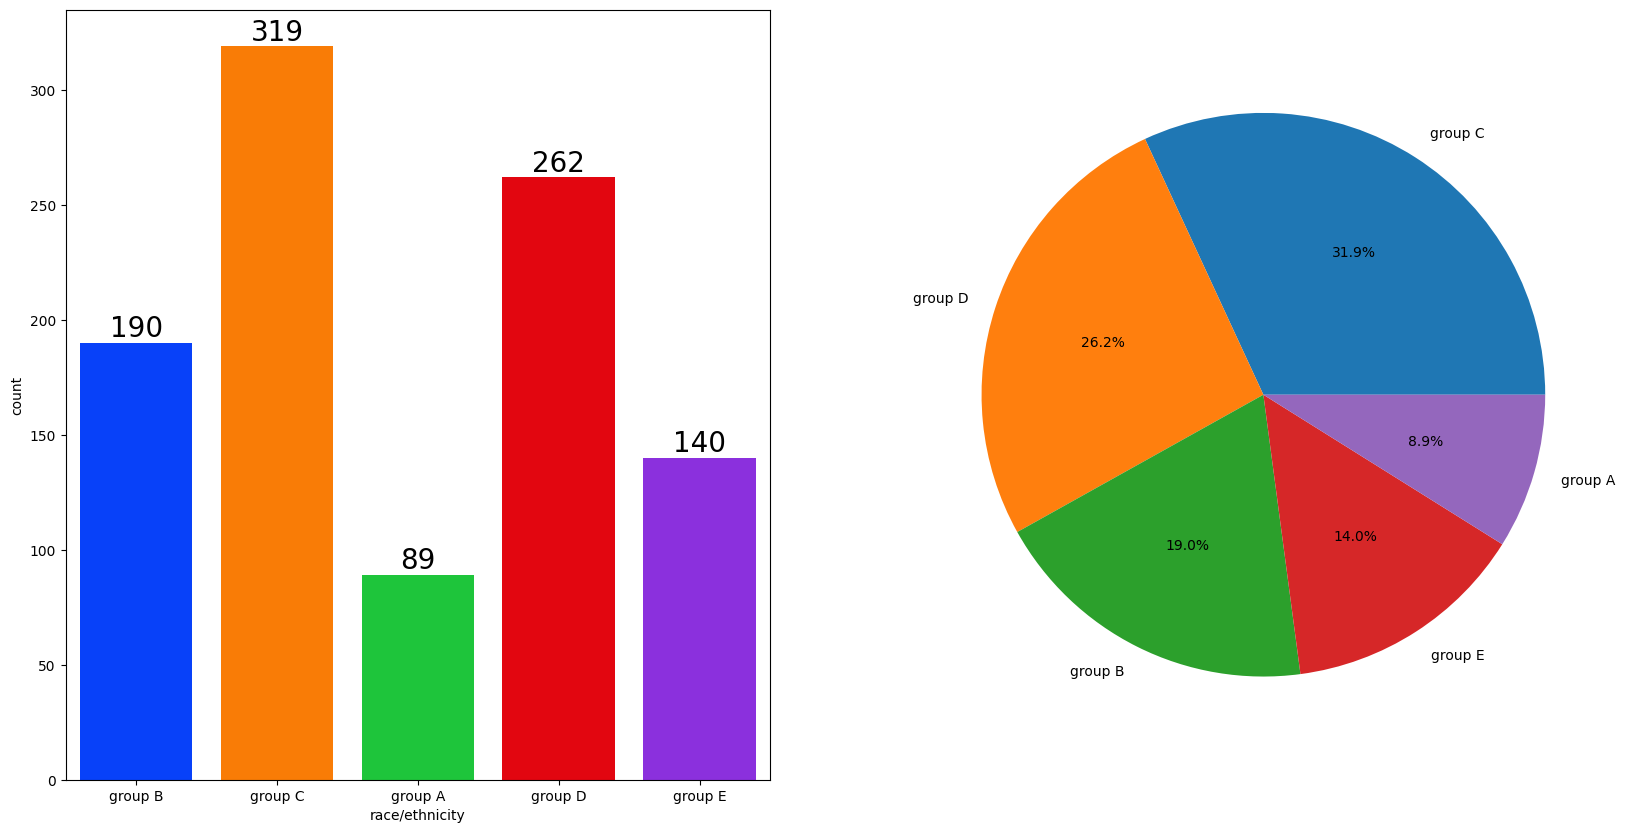

In [66]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
     ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,autopct='%1.1f%%')

#### Insights
- Most students belong to Group C and Group D.
- Group A has the least number of students.

In [74]:
race_group = df.groupby('race/ethnicity').mean(numeric_only=True)
race_group

,math score,reading score,writing score,total score,average score
race/ethnicity,,,,,
group A,61.629213,64.674157,62.674157,188.977528,62.992509
group B,63.452632,67.352632,65.600000,196.405263,65.468421
group C,64.463950,69.103448,67.827586,201.394984,67.131661
group D,67.362595,70.030534,70.145038,207.538168,69.179389
group E,73.821429,73.028571,71.407143,218.257143,72.752381


In [75]:
race_group["math score"].index

Index(['group A', 'group B', 'group C', 'group D', 'group E'], dtype='object', name='race/ethnicity')

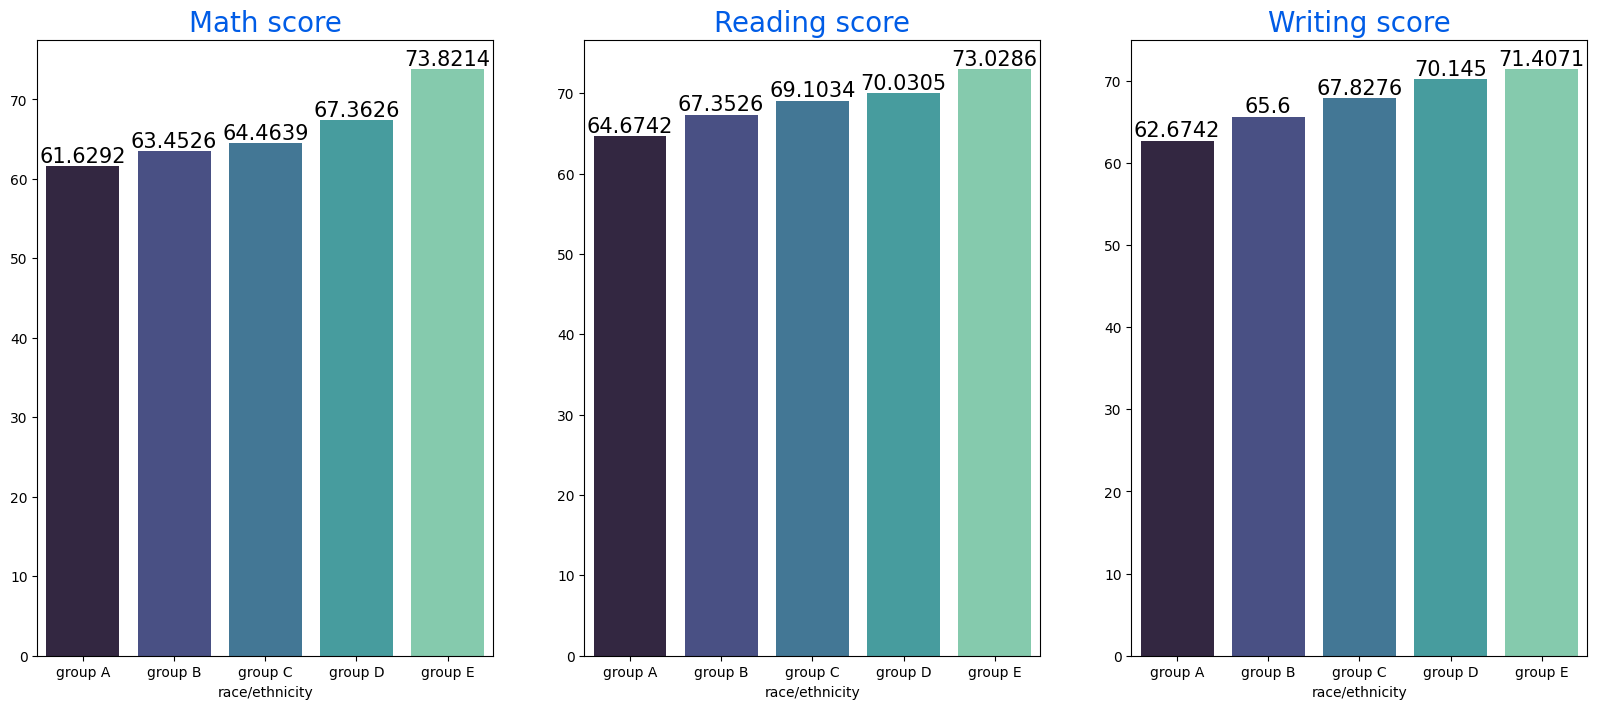

In [78]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=race_group['math score'].index,y=race_group['math score'].values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=race_group['reading score'].index,y=race_group['reading score'].values,palette = 'mako',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=race_group['writing score'].index,y=race_group['writing score'].values,palette = 'mako',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights
Scores across all three subjects follow the same trend of Group A scoring the least and slight improvements per group, with students belonging Group E performing the best.

#### 4.4.3 Parents Education

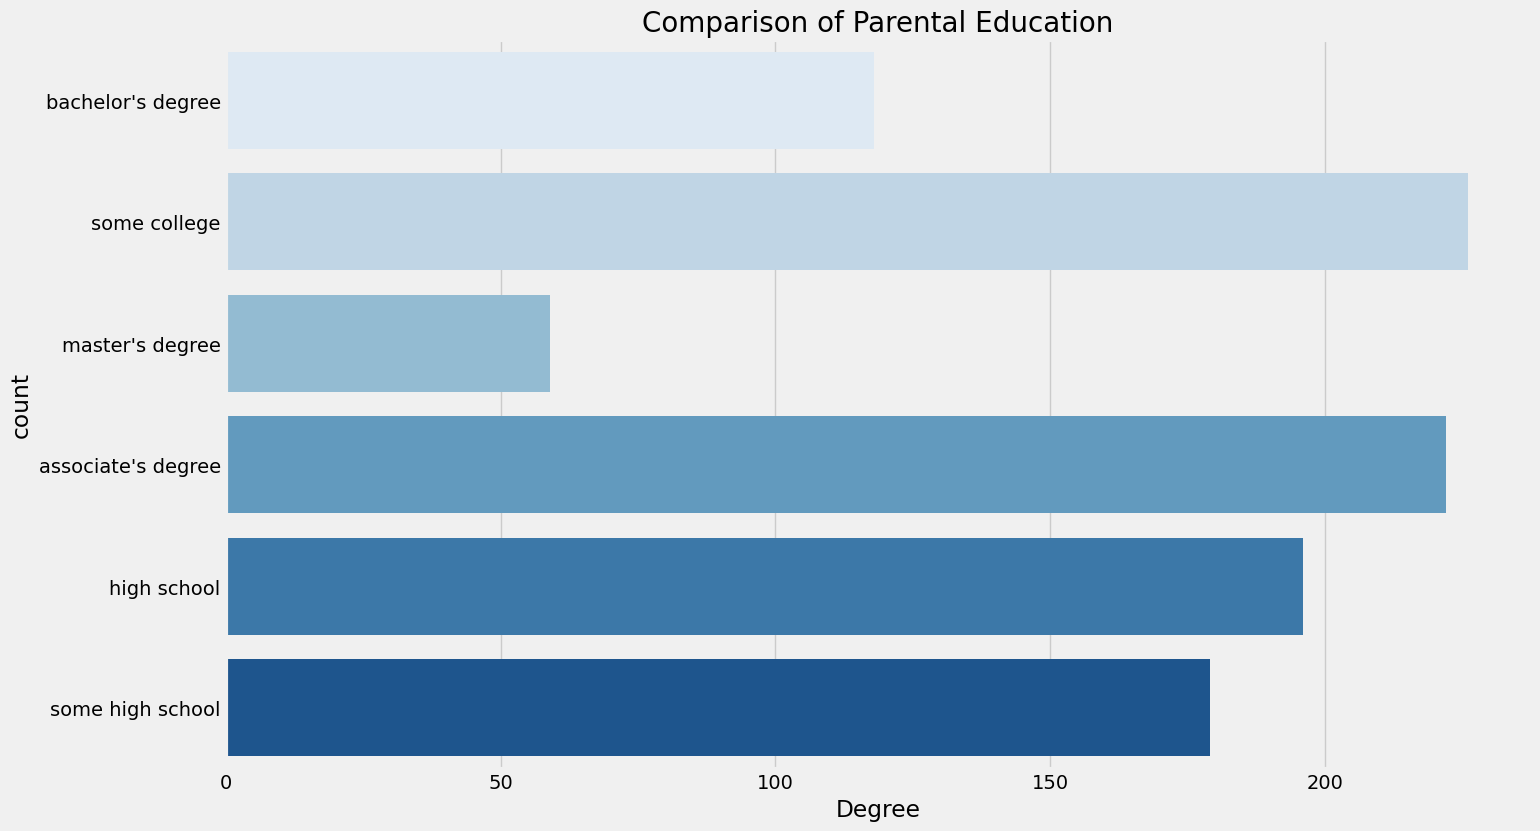

In [79]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### Insights

Largest number of parents some college and very few parents completed a master's degree.

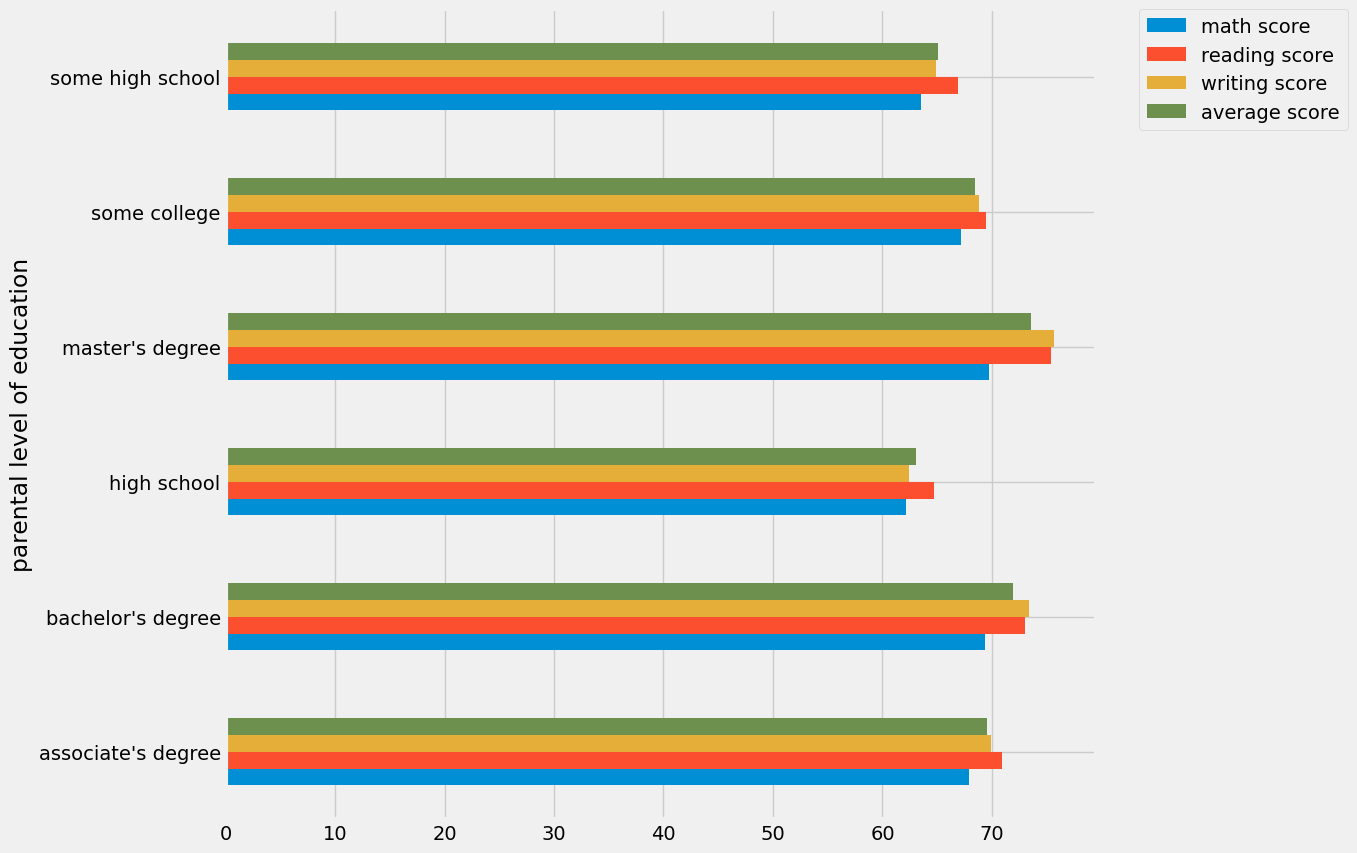

In [86]:
df.drop(columns='total score').groupby('parental level of education').mean(numeric_only=True).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights 
The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.4.4 Lunch


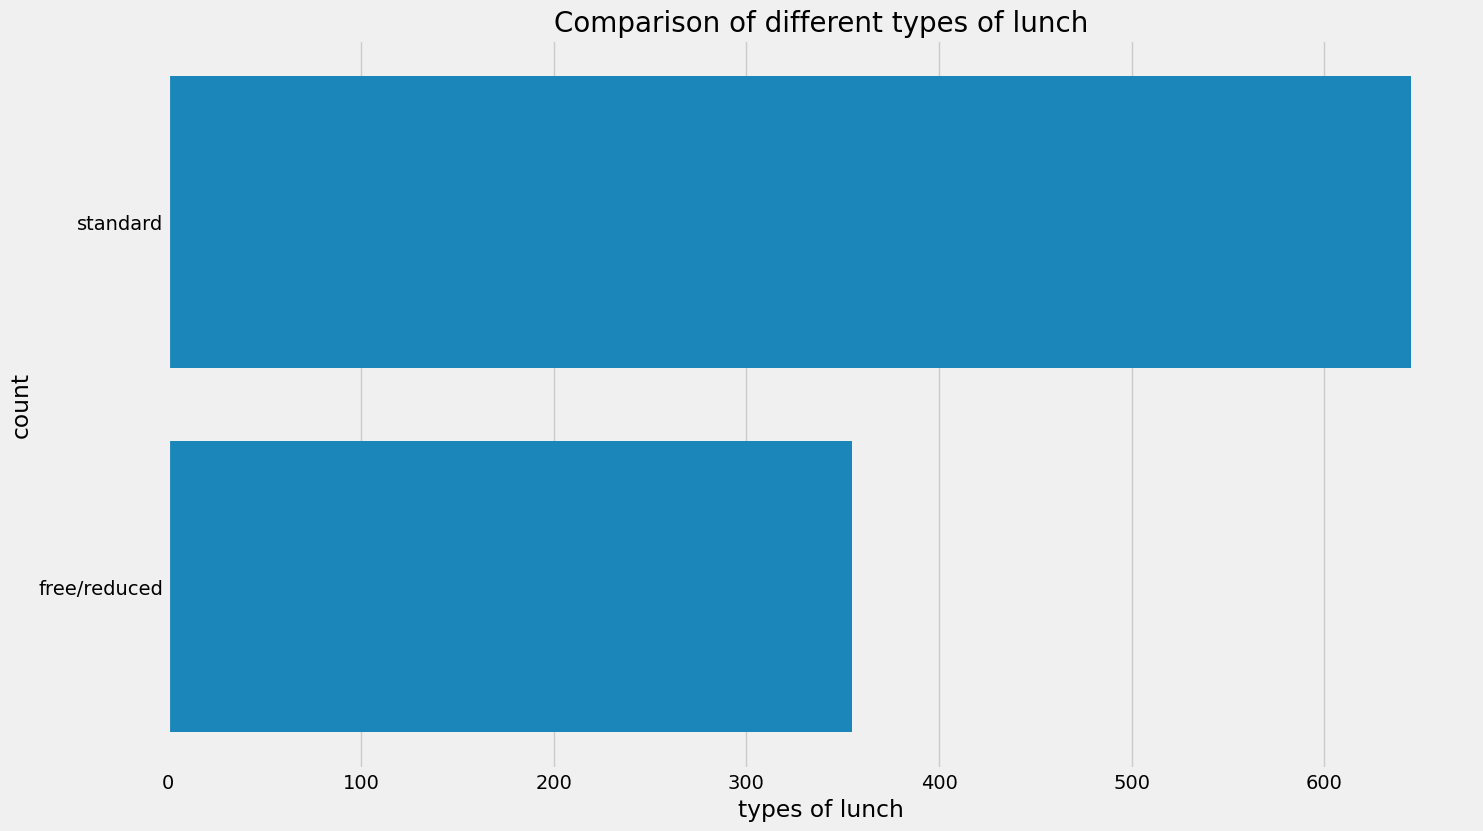

In [89]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(df['lunch'])
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

#### Insights 
Students who received Standard lunch was far more than free lunch

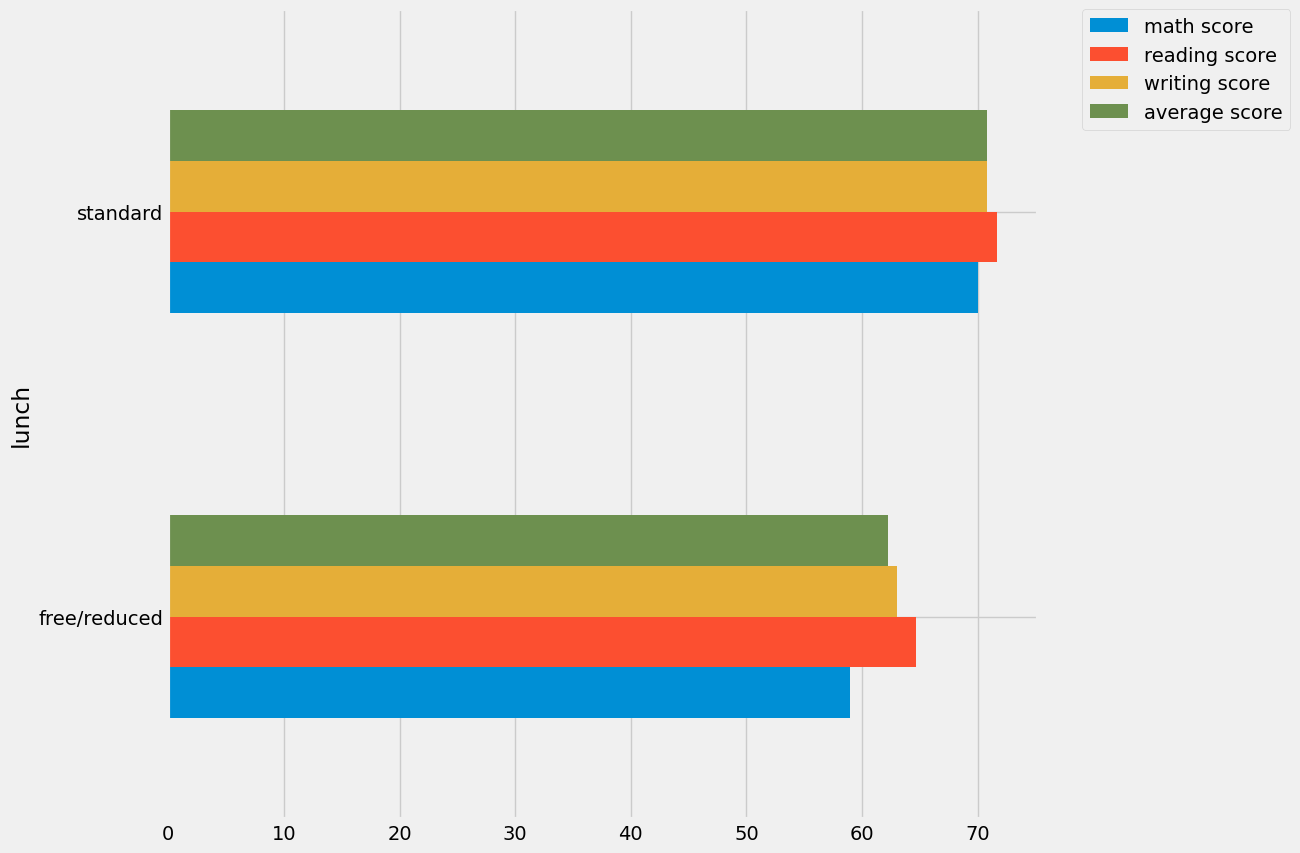

In [91]:
df.drop(columns='total score').groupby('lunch').mean(numeric_only=True).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights 
Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 Test Preparation Course

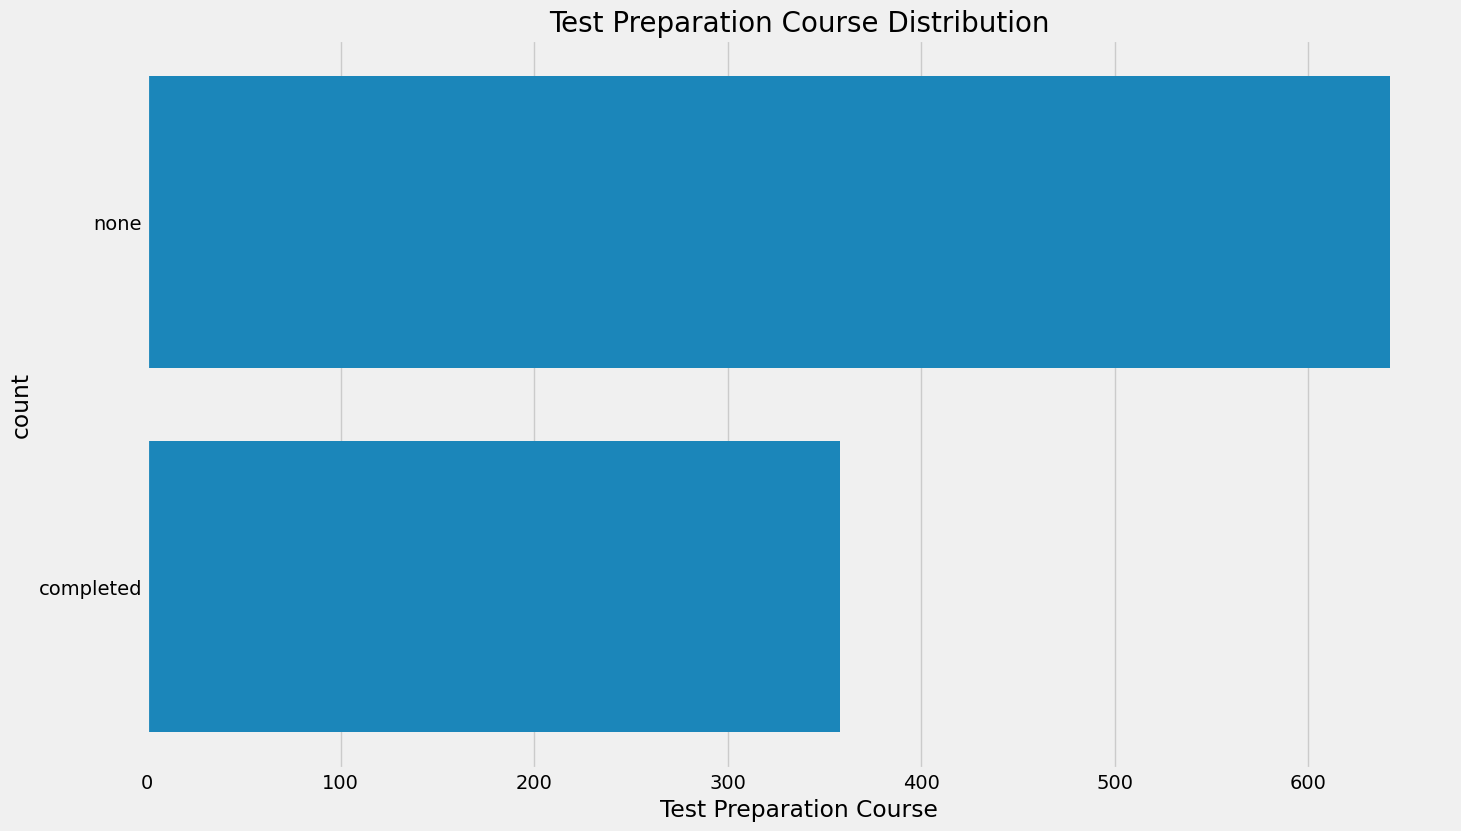

In [95]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(df['test preparation course'])
plt.title('Test Preparation Course Distribution', fontweight = 30, fontsize = 20)
plt.xlabel('Test Preparation Course')
plt.ylabel('count')
plt.show()

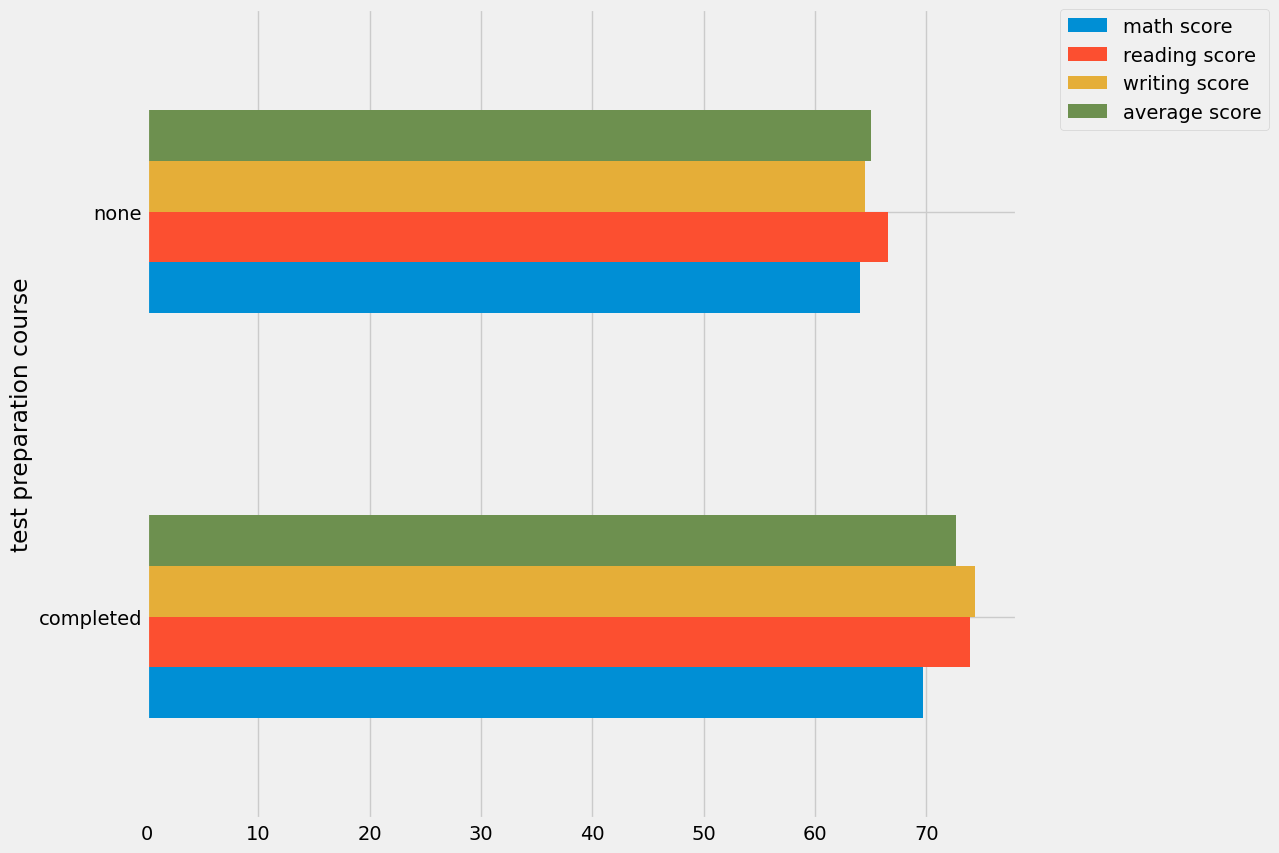

In [96]:
df.drop(columns='total score').groupby('test preparation course').mean(numeric_only=True).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights  
Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 Checking Outliers

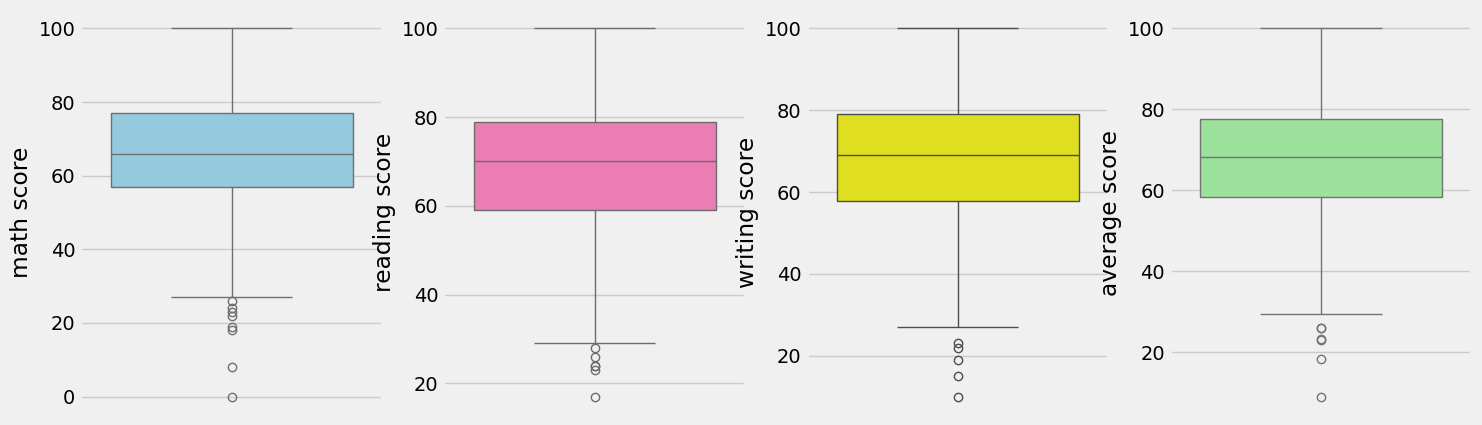

In [98]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average score'],color='lightgreen')
plt.show()